In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt

In [8]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import seaborn as sns

In [10]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [14]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
data = pd.read_csv("C:/Users/Sri/Downloads/archive (4)/car data.csv")

In [18]:
print("Head of Dataset:\n", data.head())

Head of Dataset:
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [19]:
print("\nTail of Dataset:\n", data.tail())


Tail of Dataset:
     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Seller_Type Transmission  Owner  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  


In [20]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [21]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [22]:
print("\nSummary Statistics:\n", data.describe())



Summary Statistics:
               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [23]:
print("\nShape of Dataset:", data.shape)


Shape of Dataset: (301, 9)


In [24]:
print("\nChecking Duplicate Rows:", data.duplicated().sum())


Checking Duplicate Rows: 2


In [25]:
print("\nUnique Values Column-Wise:\n", data.nunique())


Unique Values Column-Wise:
 Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64


In [26]:
data = data.dropna() 

In [27]:
numeric_data=data.select_dtypes(include=['number'])
if not numeric_data.empty:
    print("\nSkewness of Numeric Columns:\n",numeric_data.skew())
else:
    print("No numeric columns found in the DataFrame.")
    


Skewness of Numeric Columns:
 Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64


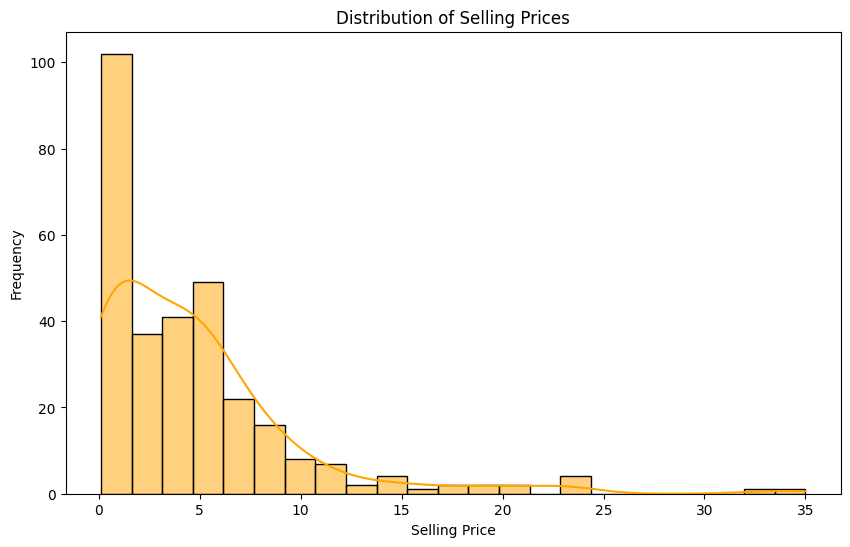

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data['Selling_Price'], kde=True, color='orange')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

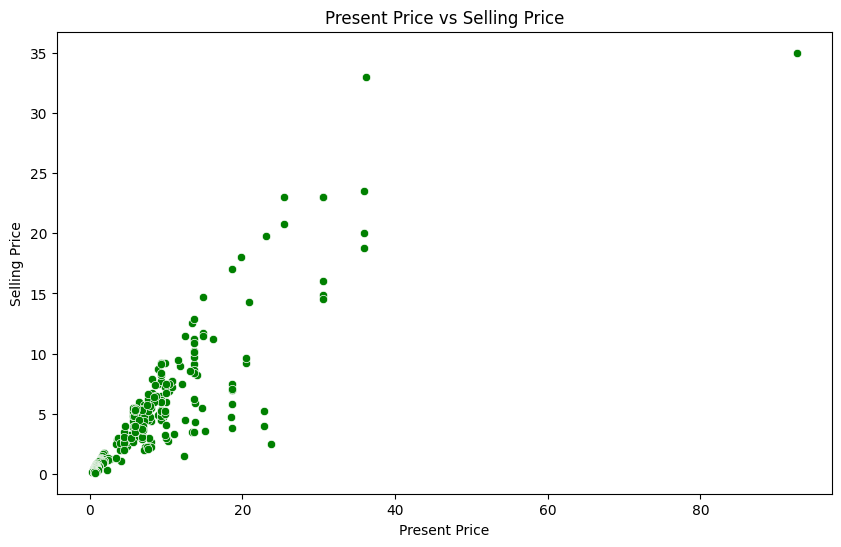

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data, color='green')
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

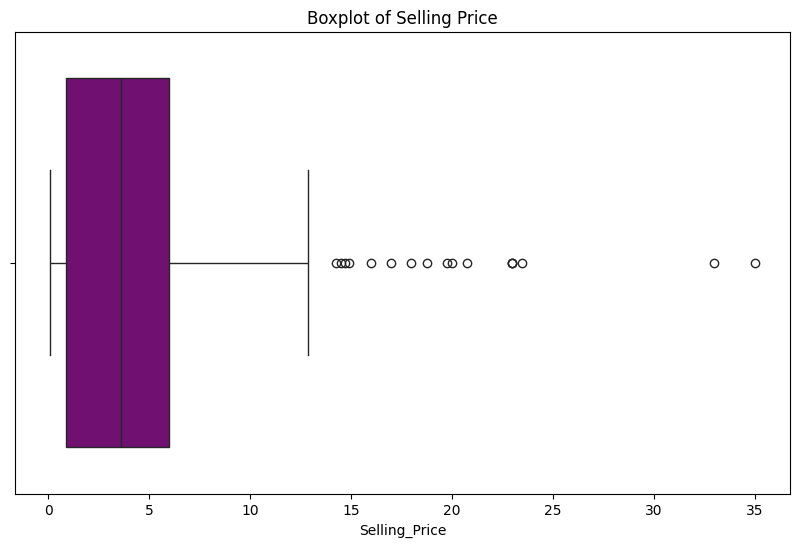

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Selling_Price'], color='purple')
plt.title('Boxplot of Selling Price')
plt.show()

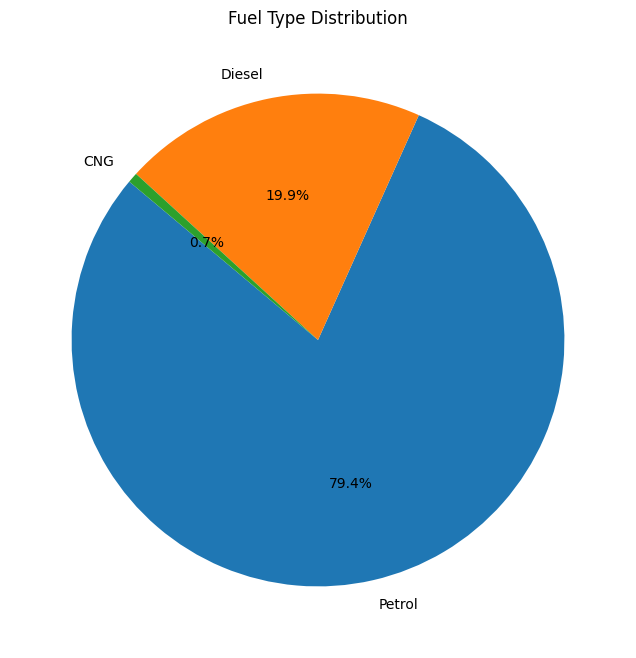

In [31]:
plt.figure(figsize=(8,8))
fuel_counts = data['Fuel_Type'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.show()

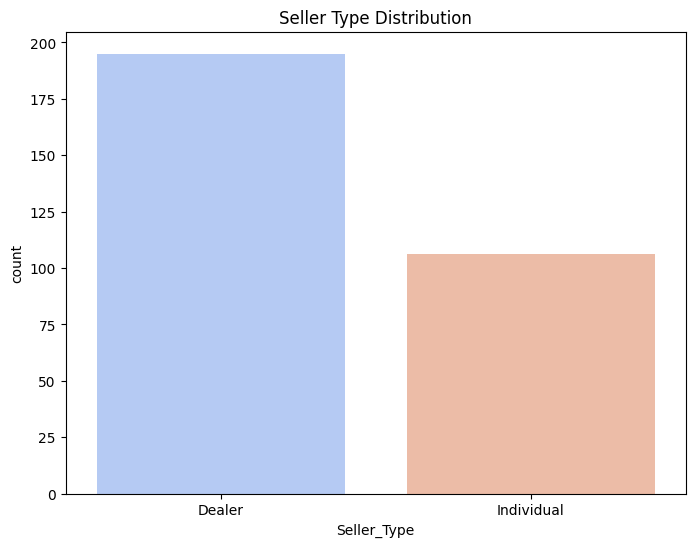

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Seller_Type', data=data, palette='coolwarm')
plt.title('Seller Type Distribution')
plt.show()


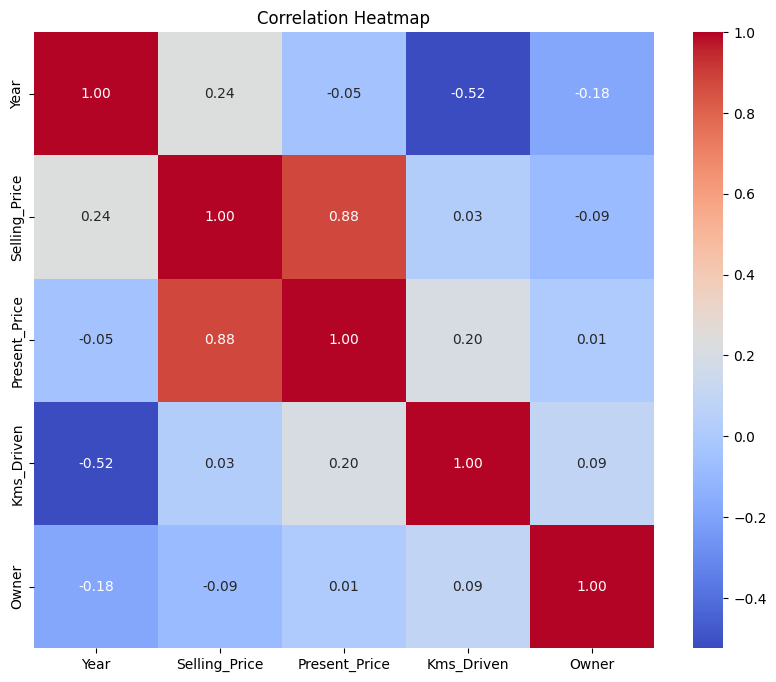

In [33]:
data_numeric=data.select_dtypes(include=['number']).dropna()
plt.figure(figsize=(10,8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

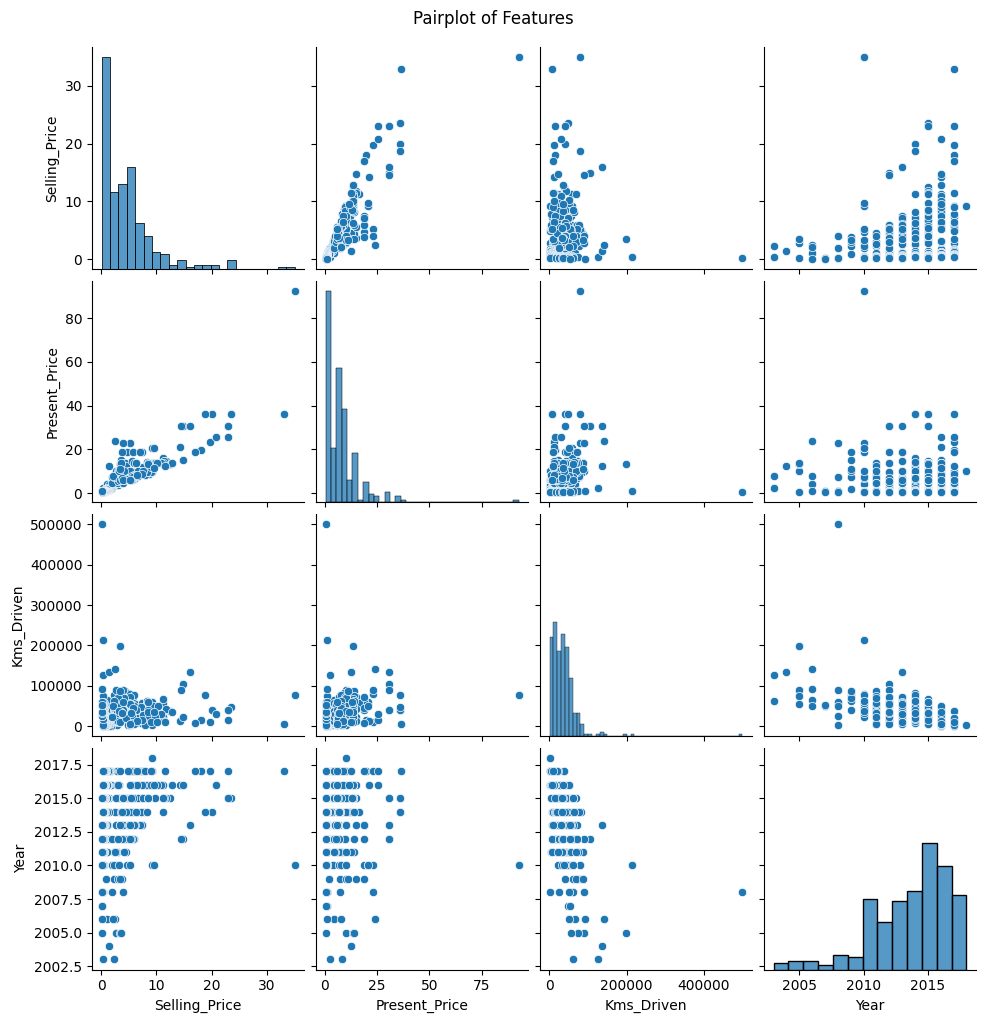

In [34]:
sns.pairplot(data[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

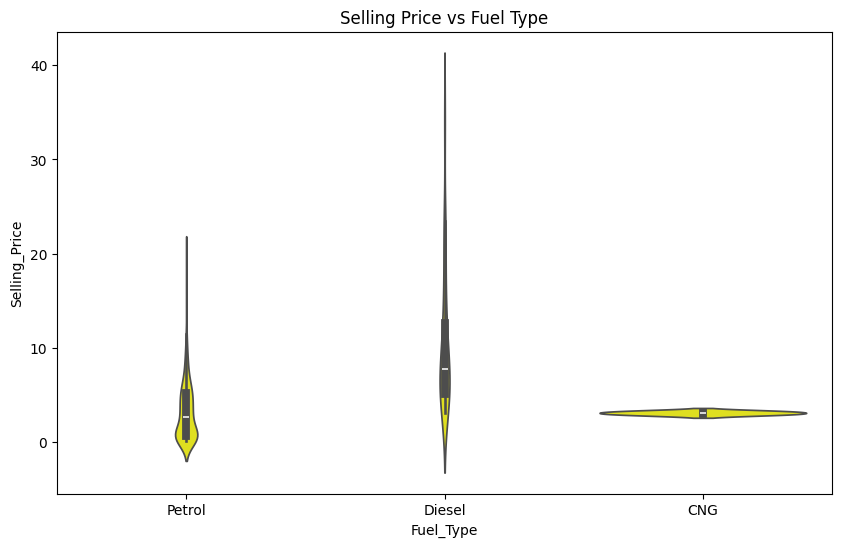

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Fuel_Type', y='Selling_Price',color='yellow', data=data)
plt.title('Selling Price vs Fuel Type')
plt.show()

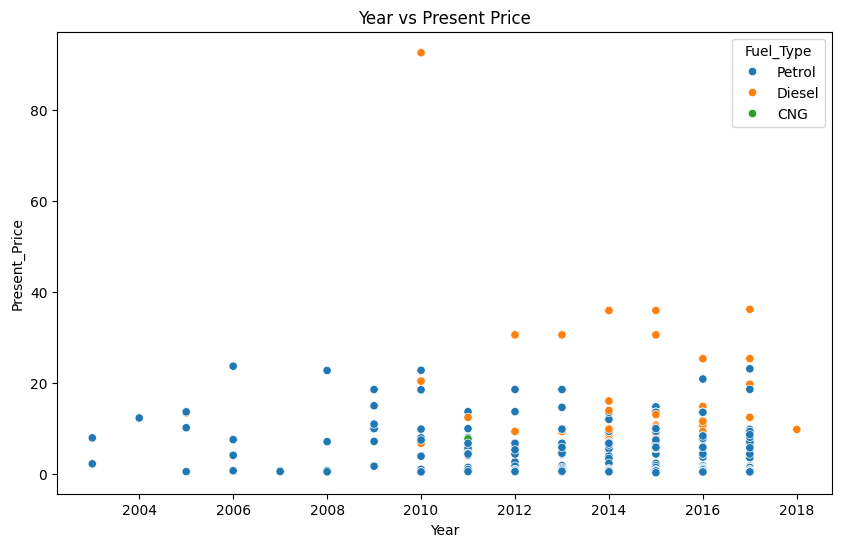

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year', y='Present_Price', hue='Fuel_Type', data=data)
plt.title('Year vs Present Price')
plt.show()


In [37]:
encoded_data = data.copy()
label_encoder = LabelEncoder()
encoded_data['Fuel_Type'] = label_encoder.fit_transform(encoded_data['Fuel_Type'])
encoded_data['Seller_Type'] = label_encoder.fit_transform(encoded_data['Seller_Type'])
encoded_data['Transmission'] = label_encoder.fit_transform(encoded_data['Transmission'])

In [38]:
X_reg = encoded_data[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Year']]
y_reg = encoded_data['Selling_Price']

In [39]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)


LinearRegression()

In [41]:
y_pred_reg = reg_model.predict(X_test_reg)


In [42]:
print("\n--- Regression Model Performance ---")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))



--- Regression Model Performance ---
Mean Squared Error: 3.528927253890554
R2 Score: 0.8468053957657468


In [43]:
median_price = data['Selling_Price'].median()
encoded_data['Price_Category'] = encoded_data['Selling_Price'].apply(lambda x: 'High' if x > median_price else 'Low')

In [44]:
X_class = encoded_data[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Year']]
y_class = encoded_data['Price_Category']


In [45]:
y_class_encoded = label_encoder.fit_transform(y_class)

In [46]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)


In [47]:

class_model = LogisticRegression(max_iter=1000)
class_model.fit(X_train_class, y_train_class)

LogisticRegression(max_iter=1000)

In [48]:
y_pred_class = class_model.predict(X_test_class)

In [49]:
print("\n--- Classification Model Performance ---")
print("Accuracy Score:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


--- Classification Model Performance ---
Accuracy Score: 0.9180327868852459

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.96      0.86      0.91        29

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



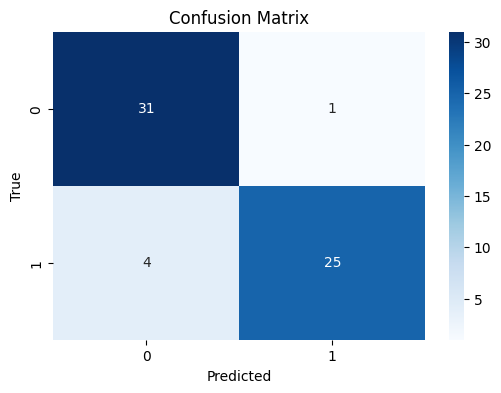

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()